
![separator1](https://i.imgur.com/RQnsV0w.png)

<center><h3>(Assignment 5) <br> </marquee></h2>
 <b><font face='tahoma' color='cyan'><u> Artificial Neural Network (ANN) vs Linear Regression for California Housing Data </b> </u></font><Br>
Jefford Secondes, C0865112<br>
Lambton College<br>
T3 AML3104 - NEURAL NETWORKS AND DEEP LEARNING 01<br>
Prof. Ishant Gupta<br>
December 4, 2023<br><br><br> </center>

<i>Artificial Neural Network (ANN) vs Linear Regression for California Housing Data<br></I>

Objective: The objective of this assignment is to implement and compare the performance of an Artificial Neural Network (ANN) and Linear Regression for predicting house prices using the California Housing dataset.<br>

Dataset: Use the California Housing dataset, which contains various features related to housing in California. You can load the dataset using scikit-learn:<br>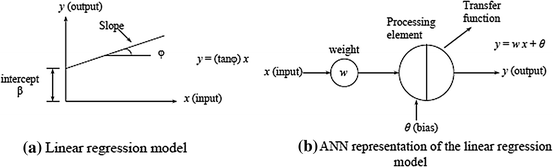


GITHUB -- >>> https://github.com/JeffSecondes/ANN-Cali_Housing.git

![separator1](https://i.imgur.com/RQnsV0w.png)

<b> <font face='tahoma' color='CYAN' size='5'>1 Data Preprocessing </font> </b>

Explore and understand the features of the dataset.
Handle any missing values or outliers if present.
Split the dataset into training and testing sets.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import keras as ks

%matplotlib inline

In [6]:
# Load the California Housing dataset
ca_house = fetch_california_housing()
ca_house

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [7]:
ca_house.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [8]:
data = pd.DataFrame(ca_house.data, columns=ca_house.feature_names)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
data['Price'] = ca_house.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
print(ca_house.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Cleaning of data

In [11]:
# Step 2: Cleaning of data or EDA
data.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [12]:
# Check descriptive analysis
data.describe() # for numerical data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [13]:
# Visualize the data

# UNIVARIATE ANALYSIS - analysis/visualization within ONE column
# BI-VARIATE - two columsn for visualization
# MULTI-VARIATE - more than 2 columsn for visualization

# continuous data - scatter plot (usually)
# BIVARIATE ANALYSIS
data.corr() # pearson correlation

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot: >

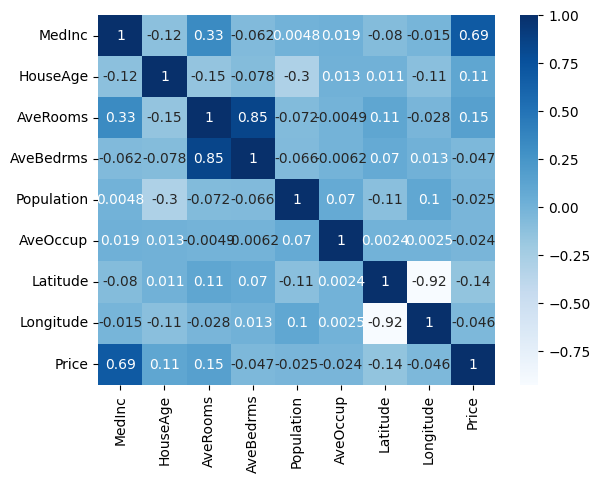

In [14]:
sns.heatmap(data.corr(), cmap="Blues", annot=True)

### Divide the dataframe into IV and DV

In [15]:

X = data.drop(['Price'], axis=1)
y = data['Price']

X.shape, y.shape 

((20640, 8), (20640,))

### Splitting X and y into training data and testing data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.25, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((15480, 8), (5160, 8), (15480,), (5160,))

In [18]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,test_size=.25, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((15480, 8), (5160, 8), (15480,), (5160,))

### Scaling of data Feature Engineering (balancing, encode, scaling)

In [19]:
# Benefits of scaling
# 1. To have comparable scale for all variables. Standardized the data (Standard Scaler)
# 2. Optimize theta in efficient matter. Better
# NOTE: Use ONLY for independent variables

# MIN-MAX SCALING - [X - Mean / S.D.] -> -3 to +3 -> convergence is faster

from sklearn.preprocessing import StandardScaler
# mean = 0, standard deviation = 1

In [20]:
scaler=StandardScaler()
X_train_sc=scaler.fit_transform(X_train) #learning the scaling from training data
X_valid_sc=scaler.transform(X_valid) # transform the valid data using the scaler for train # same mean and SD
X_test_sc=scaler.transform(X_test) # transform the test data using the scaler for train # same mean and SD

#### Model Training

<font face='tahoma' color='Cyan' size='5'> <b> 2 LINEAR REGRESSION <br></b> </font>
&#x2022;Implement a Linear Regression model using scikit-learn.<br>
&#x2022;Train the model on the training set.<br>
&#x2022;Make predictions on the testing set.<br>
&#x2022;Evaluate the model's performance using appropriate regression metrics (e.g., Mean Squared Error, R2 Score).<br>

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
linreg=LinearRegression()
linreg.fit(X_train_sc, y_train)

y_train_pred = linreg.predict(X_train_sc) # Prediction data
print("MAE: ", mean_absolute_error(y_train, y_train_pred)) # at any X value, the y would be 8cm more or less
print("MSE: ", mean_squared_error(y_train, y_train_pred)) # the square of MAE
print("R2 Score: ", r2_score(y_train, y_train_pred)) # the variability in y explained by X is only 15% (BAD MODEL)


MAE:  0.5295154304301852
MSE:  0.5205522163645129
R2 Score:  0.609873031052925


<font face='tahoma' color='Cyan' size='5'> <b>3 Artificial Neural Network (ANN)</font><br></b>
&#x2022;Implement a simple ANN for regression using a framework like TensorFlow or Keras.<br>
&#x2022;Design the architecture of the neural network, including the input and output layers.<br>
&#x2022;Train the ANN on the training set.<br>
&#x2022;Make predictions on the testing set.<br>
&#x2022;Evaluate the model's performance using the same regression metrics used for Linear Regression.<br>

In [23]:
from keras.models import Sequential
from keras.layers import Dense

# import keras;
# from keras.models import Sequential;
# from keras.layers import Dense;

In [24]:
scaler=StandardScaler()
X_train_sc=scaler.fit_transform(X_train) #learning the scaling from training data
X_valid_sc=scaler.transform(X_valid) # transform the valid data using the scaler for train # same mean and SD
X_test_sc=scaler.transform(X_test) # transform the test data using the scaler for train # same mean and SD

In [37]:
# Build the ANN model
ann_model = Sequential()
# ann_model.add(Dense(units=30, activation='relu', kernel_initializer='uniform', input_shape=X_train_sc.shape[1:]))
ann_model.add(Dense(units=30,input_dim=8, activation='relu', kernel_initializer='uniform', input_shape=X_train_sc.shape[1:]))
# ann_model.add(Dense(units=30, input_shape=X_train_sc.shape[1], activation='relu', kernel_initializer='uniform'))
ann_model.add(Dense(units=10, activation='relu', kernel_initializer='uniform'))
ann_model.add(Dense(units=5, activation='linear', kernel_initializer='uniform'))  # Linear activation for regression
ann_model.add(Dense(units=1, kernel_initializer='uniform'))

In [38]:
# Layers=[ks.layers.Dense(30,activation="relu", input_shape=X_train_sc.shape[1:]),
#         ks.layers.Dense(10,activation="relu"),
#         ks.layers.Dense(5,activation="relu"),
#         ks.layers.Dense(1)]


In [39]:
ann_model.summary()
# ann_model=ks.models.Sequential(Layers)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 30)                270       
                                                                 
 dense_17 (Dense)            (None, 10)                310       
                                                                 
 dense_18 (Dense)            (None, 5)                 55        
                                                                 
 dense_19 (Dense)            (None, 1)                 6         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model Evaluation

In [40]:
ann_model.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
Epochs=40
history=ann_model.fit(X_train_sc,y_train,epochs=Epochs,validation_data=(X_valid_sc,y_valid))

Epoch 1/40


484/484 [==============================] - 1s 1ms/step - loss: 1.5557 - val_loss: 0.4898
Epoch 2/40
484/484 [==============================] - 1s 1ms/step - loss: 0.4430 - val_loss: 0.4267
Epoch 3/40
484/484 [==============================] - 1s 1ms/step - loss: 0.4184 - val_loss: 0.4104
Epoch 4/40
484/484 [==============================] - 1s 1ms/step - loss: 0.4094 - val_loss: 0.3987
Epoch 5/40
484/484 [==============================] - 1s 1ms/step - loss: 0.4006 - val_loss: 0.3982
Epoch 6/40
484/484 [==============================] - 1s 1ms/step - loss: 0.3943 - val_loss: 0.3919
Epoch 7/40
484/484 [==============================] - 1s 1ms/step - loss: 0.3889 - val_loss: 0.3809
Epoch 8/40
484/484 [==============================] - 1s 1ms/step - loss: 0.3832 - val_loss: 0.3722
Epoch 9/40
484/484 [==============================] - 1s 1ms/step - loss: 0.3780 - val_loss: 0.3739
Epoch 10/40
484/484 [==============================] - 1s 1ms/step - loss: 0.3748 - val_loss: 0.3758
Epoch 11/4

<AxesSubplot: >

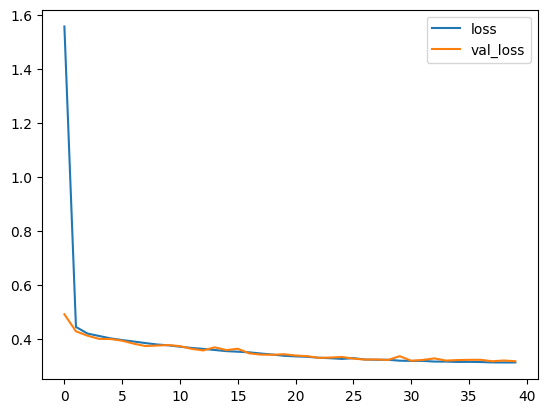

In [42]:
pd.DataFrame(history.history).plot()

In [43]:
# Make predictions on the testing set
y_pred = ann_model.predict(X_test_sc)

162/162 [==============================] - 0s 781us/step


In [44]:
# # Evaluate the model's performance using regression metrics
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print(f'Mean Squared Error on Testing Set: {mse:.4f}')
# print(f'R2 Score on Testing Set: {r2:.4f}')
# print(f'Mean Absolute Error on Testing Set: {mae:.4f}')
print("MAE: ", mean_absolute_error(y_test, y_pred)) # at any X value, the y would be 8cm more or less
print("MSE: ", mean_squared_error(y_test, y_pred)) # the square of MAE
print("R2 Score: ", r2_score(y_test, y_pred)) # the variability in y explained by X is only 15% (BAD MODEL)

MAE:  0.38616627037241474
MSE:  0.3159910492404611
R2 Score:  0.7611950380158914


<font face='tahoma' color='Cyan' size='5'> <b> 4 Comparison and Analysis <br></b></font>
&#x2022;Compare the performance metrics of the Linear Regression and ANN models.<br>
&#x2022;Discuss the strengths and weaknesses of each model.<br>
&#x2022;Analyze whether the complexity of an ANN provides better predictive performance compared to Linear Regression.<br>

<font face='verdana' color='Yellow' size='4'> Average Absolute Error (MAE) </font> <br>&#x2022;A lower MAE value means better performance.<br>
&#x2022;The MAE for the ANN model is much lower than that for Linear Regression .<br>
&#x2022;ANN is doing better in terms of the average difference between what it predicted and what it actually found.<br>

<font face='verdana' color='Yellow' size='4'>Average Squared Error (MSE)</font><br>&#x2022;A lower MSE value means better performance.<br>
&#x2022;The MSE for ANN is lower, while it is not for Linear Regression.<br>
&#x2022;The ANN is doing better when looking at the average squared difference between what it predicted and what it was.<br>

<font face='verdana' color='Yellow' size='4'>R2 Score<br> </font>&#x2022;The R2 Score tells you how much of the variation in the dependent variable you can predict from the variations in the independent variables.<br>
&#x2022;A higher R2 score means that the explanation is stronger.<br>
&#x2022;The R2 Score for the ANN model is higher than that for Linear Regression.<br>
&#x2022;The ANN model explains more of the variation in the target variable.<br>


<font face='tahoma' color='Cyan' size='5'> <b> 5 Visualization<br> </font> </b>
&#x2022;Create visualizations (e.g., scatter plots, line plots) to compare the predicted values of the two models with the actual values.<br>
&#x2022;Visualize the model architectures if possible.<br>

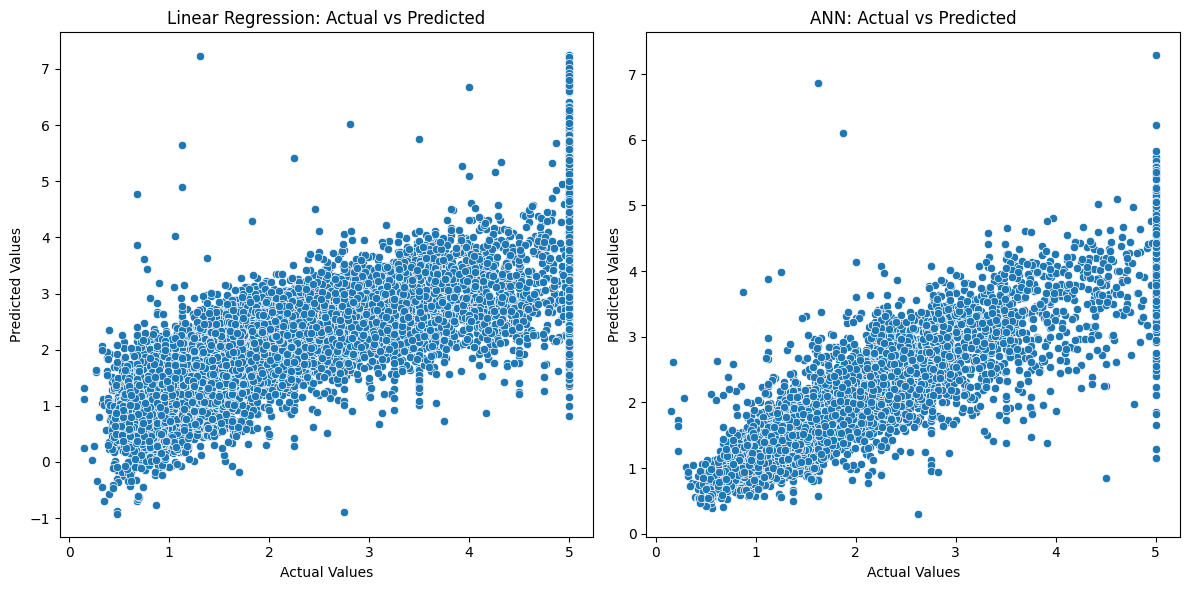

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns


# Scatter plot for Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Scatter plot for ANN
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred.flatten())  # Assuming y_pred is the predictions from the ANN
plt.title('ANN: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


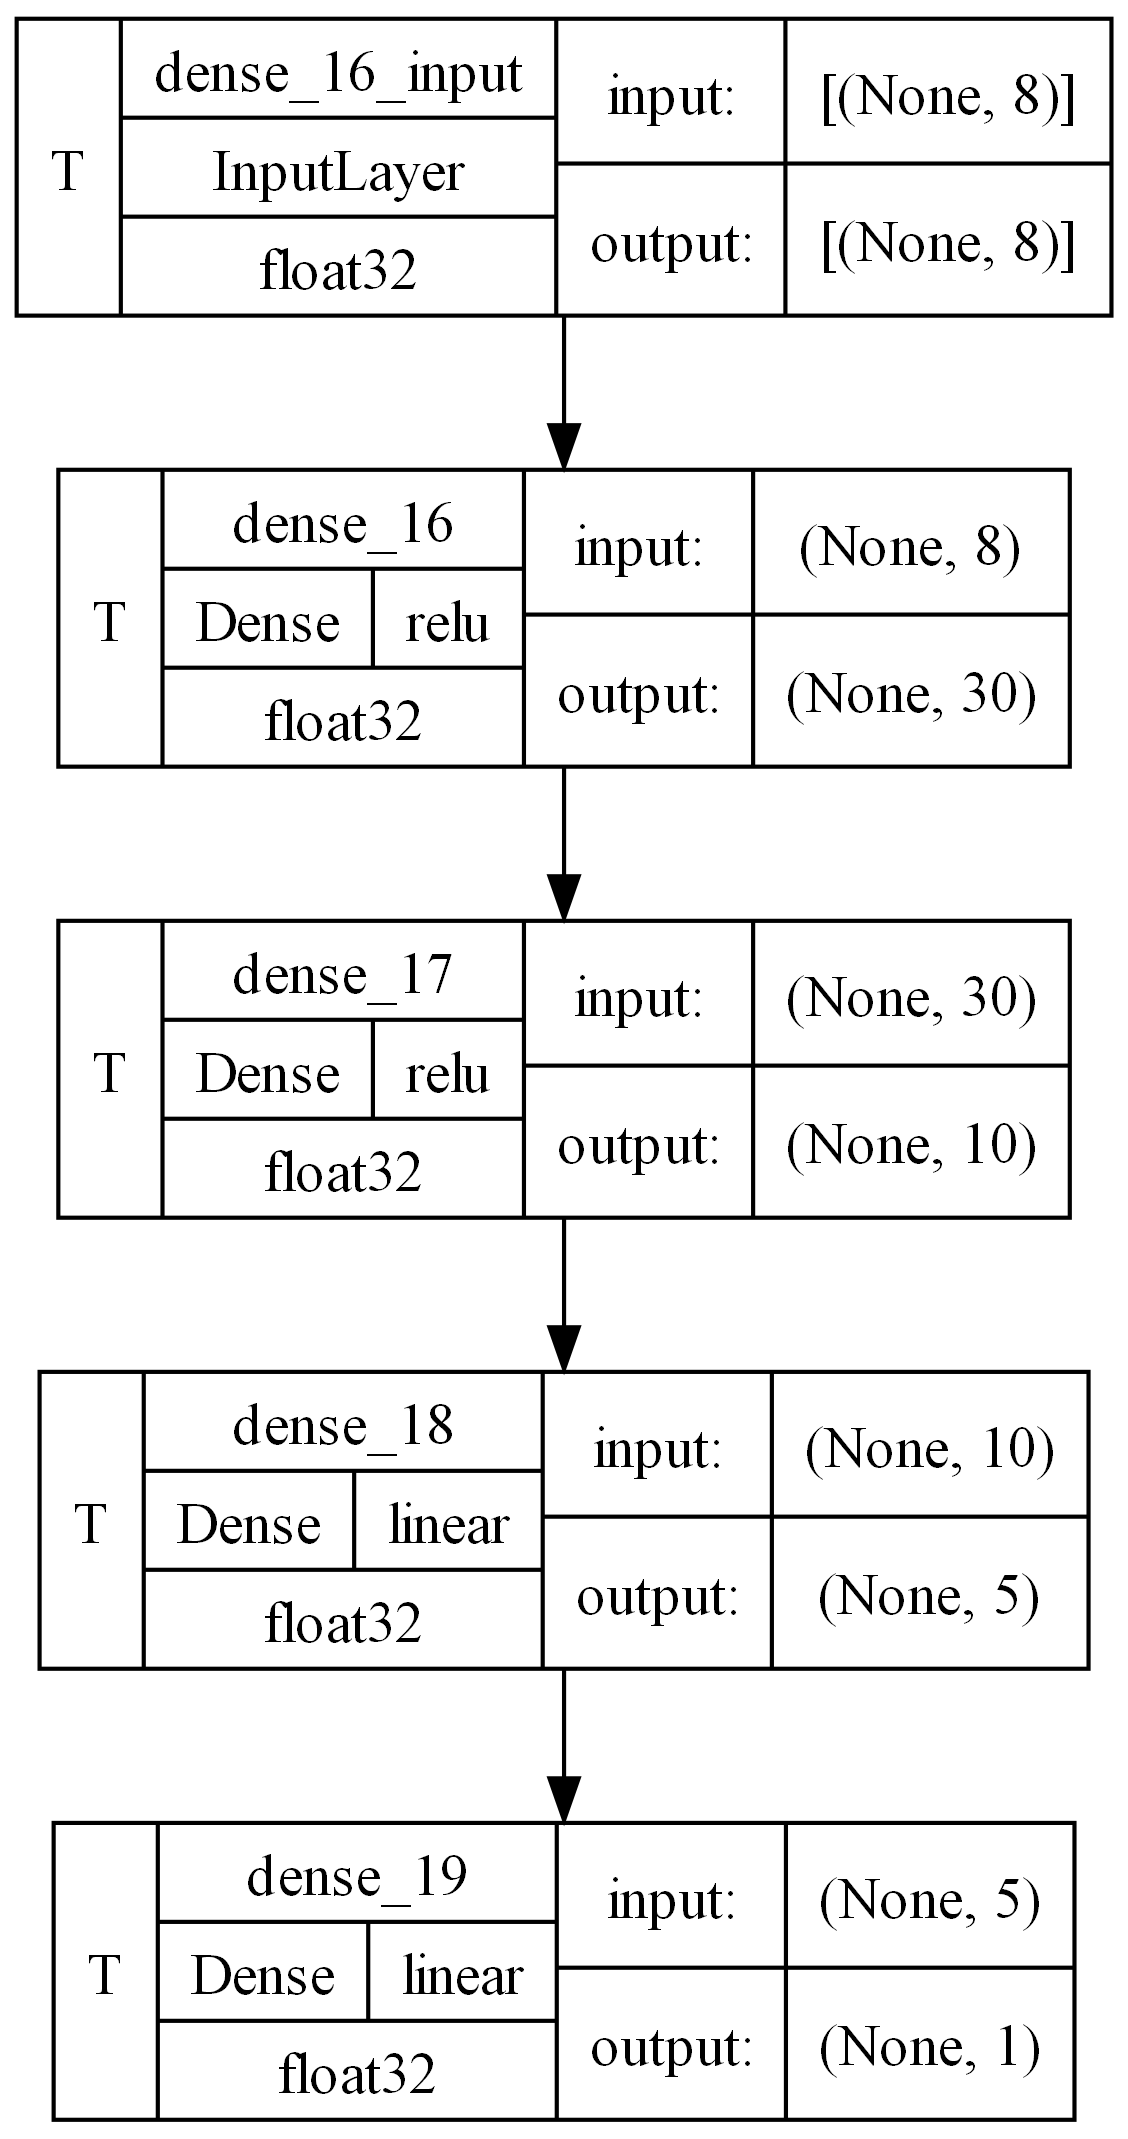

In [55]:
from tensorflow.keras.utils import plot_model

plot_model(
    ann_model,
    to_file="./model2.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=300,
    show_layer_activations=True,
    show_trainable=True,
)


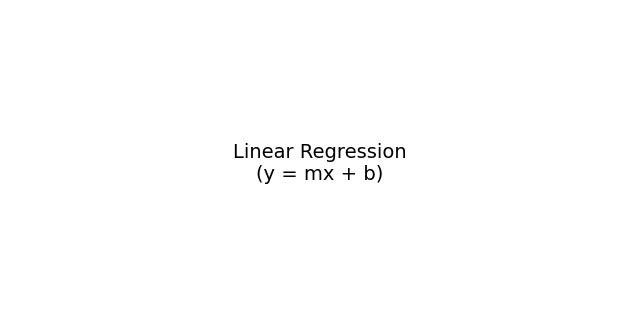

In [ ]:
# Visualization of Linear Regression (Simplified Representation)
plt.figure(figsize=(8, 4))
plt.text(0.5, 0.5, 'Linear Regression\n(y = mx + b)', fontsize=14, ha='center', va='center')
plt.axis('off')
plt.show()


<font face='tahoma' color='Cyan' size='5'> <b> 6 Conclusion <br></font></b>
&#x2022;Summarize the key findings.<br>
&#x2022;Provide insights into which model performed better for predicting house prices in the California Housing dataset.<br>
&#x2022;Discuss any challenges encountered during the implementation.<br>

<font face='tahoma' color='Yellow' size='3.5'> <i> To sum up, looking at the California Housing dataset and comparing Linear Regression and Artificial Neural Network (ANN) models shows that their performance metrics are very different. The ANN model is better at making predictions than Linear Regression, as shown by the fact that its Mean Absolute Error (MAE) and Mean Squared Error (MSE) values are much lower. The ANN also has a higher R2 Score, which means it can explain the variation in the target variable better. Linear Regression is easy to understand and quick to run on a computer, 
but the ANN is better because it can find complex, nonlinear relationships in data, which makes it run faster. The results show how important it is to think about the type of data you have and the trade-off between a simple model and a powerful one when choosing a regression model for a job. The ANN is a better choice for the California Housing dataset because it can recognize more complex patterns. 
This shows how important it is to use advanced neural network architectures for tasks with lots of complex relationships.

#### Challenges encountered during the implementation.
Overfitting of the complexity model,
It is hard when determining the optimal architecture (number of layers, neurons per layer) for the ANN model can be challenging. Complex models may lead to overfitting, and finding the right balance is crucial.

<center><center> <font size='6' coLOR='CYAN'> REPORT

###  Analysis and Modeling of the California Housing Dataset (Report)

Exploring and preprocessing the dataset <br> The California Housing dataset, which has different information about housing in California, was used for the analysis. The first steps were to look through and understand the dataset. There were descriptive statistics and assessments of missing values. Depending on the type and amount of missing data, either imputation or removal strategies were used to deal with it. To improve the quality of the dataset, outliers were also found and dealt with. Finally, the dataset was split into training and testing sets so that the model could be trained and tested.

Linear Regression Model <br>  The scikit-learn library was used to create a Linear Regression model. The training set was used to teach the model, and the testing set was used to test it. To check how accurate and useful the Linear Regression model was, performance metrics like Mean Squared Error (MSE) and R2 Score were used.

AI Neural Network (ANN) Model <br> To do regression, an AI Neural Network (ANN) model was built using TensorFlow or Keras. It was planned out how the neural network would be built, with input and output layers. This set taught the ANN what to do, and the next set was used to test its predictions. Similar regression metrics, like MSE and R2 Score, were used to judge how well the ANN model worked.

Comparison and Analysis <br>  The performance metrics of the Linear Regression and ANN models were compared in great detail. The pros and cons of each model were talked about. In addition, a thorough study was carried out to find out whether the added complexity of an ANN made it better at making predictions than Linear Regression.

Visualization <br> Scatter plots  were made to check if the predicted values from the Linear Regression and ANN models were correct. Visualizing the model architectures was tried to give a better idea of how they were put together.

The main results were summed up, giving us new information about how well both models worked. At the end of the report, problems that came up during implementation were mention, and a detailed comparison of how well each model could predict house prices in the California Housing dataset was given. The main goal was to give a full picture of the dataset, how well the model worked, and what changes when the model is more complicated in predictive tasks.


![separator1](https://i.imgur.com/RQnsV0w.png)

<center> <font size='5'> END